## Exercise 1: Decisive Distributions

### Import Dependencies

In [7]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("../../Activities/01-Ins_Getting_into_Probability_Distributions/Solved/keys.env")

%matplotlib inline

In [8]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [18]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
df_tickers = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_tickers.head()

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2019-05-01 00:00:00-04:00  209.88  215.3100  209.230  210.52  57751414   
2019-05-02 00:00:00-04:00  209.84  212.6500  208.130  209.17  29014844   
2019-05-03 00:00:00-04:00  210.74  211.8400  210.230  211.78  17987793   
2019-05-06 00:00:00-04:00  204.29  208.8400  203.500  208.60  28949691   
2019-05-07 00:00:00-04:00  205.88  207.4175  200.825  202.86  34328425   

                              DIS                                     ...  \
                             open    high      low   close    volume  ...   
time                                                                  ...   
2019-05-01 00:00:00-04:00  137.49  138.17  136.235  136.32   7588692  ...   
2019-05-02 00:00:00-04:00  135.38  135.69  132.380  134.19  14963432  ...   
2019-05-03 00:00:00-04:00  135.22  135.31  133.780  134.28   8073628  ...   
2019-05-06 00:00:00-04:00  132.54  135.33  132.300  135.05   8946397  ...   
2019-05-07 00:00:00-04:00  135.35  135.97  132.760  133.47   9737952  ...   

                              SPY                                    WORK  \
                             open    high     low   close     volume open   
time                                                                        
2019-05-01 00:00:00-04:00  294.72  294.95  291.80  291.84   59432706  NaN   
2019-05-02 00:00:00-04:00  291.68  292.70  289.52  291.27   59209780  NaN   
2019-05-03 00:00:00-04:00  292.82  294.34  292.56  294.02   45416907  NaN   
2019-05-06 00:00:00-04:00  289.25  293.31  288.90  292.87   75426654  NaN   
2019-05-07 00:00:00-04:00  290.15  290.81  285.81  288.04  118960368  NaN   

                                                 
                          high low close volume  
time                                             
2019-05-01 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-02 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-03 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-06 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-07 00:00:00-04:00  NaN NaN   NaN    NaN  

[5 rows x 30 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [20]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_tickers[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-05-01,291.84,53.89,136.32,210.52,77.51,NaN
2019-05-02,291.27,53.37,134.19,209.17,77.46,NaN
2019-05-03,294.02,53.62,134.28,211.78,78.06,NaN
2019-05-06,292.87,53.48,135.05,208.60,78.06,NaN
2019-05-07,288.04,52.20,133.47,202.86,77.96,NaN


### Calculate the daily returns for each stock using the `pct_change()` function

In [21]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-06-21,-0.005949,-0.005437,-0.012184,-0.002906,-0.010156,-0.046514
2019-06-24,-0.001496,0.000000,-0.007486,-0.001258,-0.002028,-0.031434
2019-06-25,-0.009706,-0.004295,0.005028,-0.015009,0.007173,-0.019306
2019-06-26,-0.001100,-0.005490,0.003431,0.021629,-0.010208,0.060770
2019-06-27,0.003684,0.000197,-0.007978,-0.000350,0.002039,-0.025013


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

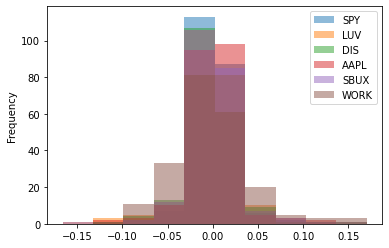

In [22]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5

df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

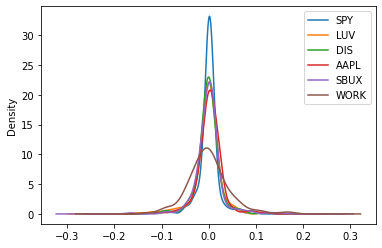

In [23]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns.plot.density()